In [1]:
import matplotlib.pyplot as plt
import numpy as np
from functools import partial

In [2]:
def draw_acc(log_file, ax, left=True):
    results = np.atleast_2d(log_file)
    MAC = 306264576
    ann_acc = results[:, 0]
    ann_syn = results[:, 1]
    snn_acc = results[:, 2]/100
    snn_syn = results[:, 3]
    trial = results[:, -1]

    i_start = 17
    num_point = 2
    
    x1 = 0.84
    x2 = 0.93
    y1 = 3e7
    y2 = 1e10
    
    if left:
        ax.plot(ann_acc[1:i_start], ann_syn[1:i_start], 'rx', label="ANN: Weights scale")
        ax.plot(snn_acc[1:i_start], snn_syn[1:i_start], 'cx', label="SNN: Weights scale")

        ax.plot(ann_acc[i_start::num_point], ann_syn[i_start::num_point], 'b.', label="ANN: SynOp + Quant.")
        ax.plot(ann_acc[i_start+1::num_point], ann_syn[i_start+1::num_point], 'b.')
        ax.plot(snn_acc[i_start::num_point], snn_syn[i_start::num_point], 'g.', label="SNN: SynOp + Quant.")
        ax.plot(snn_acc[i_start+1::num_point], snn_syn[i_start+1::num_point], 'g.')
        
        ax.plot([x1, x1], [y1, y2], 'k--', alpha=0.5)
        ax.plot([x2, x2], [y1, y2], 'k--', alpha=0.5)
        ax.plot([x1, x2], [y1, y1], 'k--', alpha=0.5)
        ax.plot([x1, x2], [y2, y2], 'k--', alpha=0.5)
    
    
        ax.legend(loc="upper left")
        ax.set_xlim(0.1, 1)
        
        ax.set_ylim(1e6, 100e9)
        ax.set_xlabel("Test-set accuracy")
        ax.set_ylabel("Synaptic operations (SynOps)")
        

    if not left:
        ax.plot(ann_acc[1:i_start], ann_syn[1:i_start], 'rx', alpha = 0.5, label="ANN: Weights scale")
        ax.plot(snn_acc[1:i_start], snn_syn[1:i_start], 'cx', alpha = 0.5, label="SNN: Weights scale")

        ax.plot(ann_acc[i_start::num_point], ann_syn[i_start::num_point], 'b.', alpha = 0.5, label="ANN: SynOp + Quant.")
        ax.plot(ann_acc[i_start+1::num_point], ann_syn[i_start+1::num_point], 'b.', alpha = 0.5)
        ax.plot(snn_acc[i_start::num_point], snn_syn[i_start::num_point], 'g.', alpha = 0.5, label="SNN: SynOp + Quant.")
        ax.plot(snn_acc[i_start+1::num_point], snn_syn[i_start+1::num_point], 'g.', alpha = 0.5)
    
    
        ax.grid(True)
        ax.set_xlim(x1, x2)
        ax.set_ylim(y1, y2)
        ax.set_xticks(np.arange(x1, x2, 0.01), minor=True)
        ax.grid(axis='x', markevery=0.01, which='both')
        
        for index_p in [70, 69, 60, 58, 53, 43]:
            ax.plot(snn_acc[index_p], snn_syn[index_p], 'g+', markersize=15)
            a = snn_acc[index_p]
            b = snn_syn[index_p]
            ax.annotate('%.2f%% @ %dM'%(a*100, np.round(b*1e-6)), xy=(a, b),  xycoords='data',
                xytext=(a+0.002, b), textcoords='data',
                horizontalalignment='left', verticalalignment='top', color='g', alpha=0.5
            )

        a = 0.9155
        b = 6.18e8
        ax.plot(a, b, 'm', marker='^', markersize=8)
        ax.annotate('Sengupta et al. 2019\n%.2f%% @ %dM'%(a*100, np.round(b*1e-6)), xy=(a, b),  xycoords='data',
            xytext=(a+0.002, b*1.1), textcoords='data',
            horizontalalignment='left', verticalalignment='top', color='m', alpha=0.5
        )
        
        a = 0.8487
        b = 4.60e8
        ax.plot(a, b, 'm', marker='^', markersize=8)
        ax.annotate('Rueckauer et al. 2017\n%.2f%% @ %dM'%(a*100, np.round(b*1e-6)), xy=(a, b),  xycoords='data',
            xytext=(a+0.002, b*1.1), textcoords='data',
            horizontalalignment='left', verticalalignment='top', color='m', alpha=0.5
        )
        
        a = snn_acc[13]
        b = snn_syn[13]
        ax.plot(a, b, 'c', marker='x', markersize=15)
        ax.annotate('%.2f%% @\n %dM'%(a*100, np.round(b*1e-6)), xy=(a, b),  xycoords='data',
            xytext=(a-0.02, b*1.3), textcoords='data',
            horizontalalignment='left', verticalalignment='top', color='c', alpha=0.5
        )
        
        a = ann_acc[0]
        b = MAC
        ax.annotate('  %.2f%% @\nMAC=%dM'%(a*100, np.round(b*1e-6)), xy=(a, b),  xycoords='data',
            xytext=(a-0.026, b*1.3), textcoords='data',
            horizontalalignment='left', verticalalignment='top', color='r', alpha=0.5
        )
        ax.plot(a, b, 'r*', markersize=15, label="ANN: Original")

    ax.set_yscale('log')
    
    return results

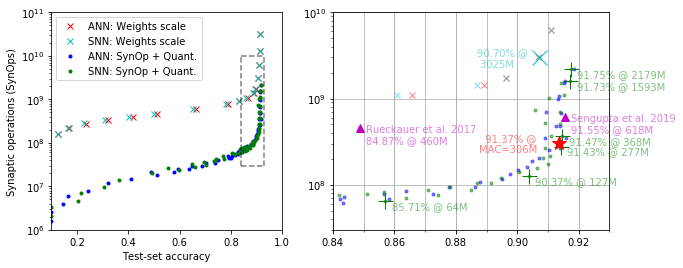

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={'width_ratios': [2.5, 3]})
f1 = np.loadtxt("log_inference.txt")
results = draw_acc(f1, ax[0])
draw_acc(f1, ax[1], False)
plt.savefig("analog_CIFAR_inference.pdf")